In [1]:
import pandas as pd
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
from collections import Counter, defaultdict

In [4]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
df = df_[df_["cluster"]==4]

def tokenize(dataset, column):
    from nltk.stem import WordNetLemmatizer 
    import re 
    lemmatizer = WordNetLemmatizer()
    tokenized_sentences = []
    for comment in dataset[column]:
        comment = re.sub("[^-9A-Za-z ]", "" , comment)
        comment = re.sub(r'https?:\/\/?[a-z0-9]+\.[a-z0-9\/]+', 'URL', comment)
        comment = comment.lower()
        tokens = nltk.word_tokenize(comment)
        for word in comment:
            word = lemmatizer.lemmatize(word) 
        
        tokens = " ".join(tokens)
        tokenized_sentences.append(tokens)
    dataset[column] = tokenized_sentences

tokenize(df, "text")

def remove_stopwords(dataset, column):
    stop_words = set(stopwords.words('english')) 
    sentences=[] 
    for comment in dataset["text"]:
        sentence=[] 
        comment = nltk.word_tokenize(comment)
        for word in comment:
            if word not in stop_words:
                sentence.append(word)
        sentences.append(sentence)
    dataset[column] = sentences

remove_stopwords(df,'text')

df.to_csv("topic_4_tokenized_no_stopwords.csv")

C:\Users\vomit\AppData\Local\Temp\ipykernel_20400\2299475640.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = tokenized_sentences
C:\Users\vomit\AppData\Local\Temp\ipykernel_20400\2299475640.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[column] = sentences


In [12]:
df= pd.read_csv("topic_4_tokenized_no_stopwords.csv")

In [14]:
noworldnews= df[df["subreddit"] != "World News"]

In [16]:
noworldnews[noworldnews["subreddit"]== "World News"]

,Unnamed: 0.1,Unnamed: 0,id,text,url,type,postbody,score,created,subreddit,embeddings,cluster


In [17]:
noworldnews.to_csv("topic_4_tokenized_no_stopwords_noworldnews.csv")

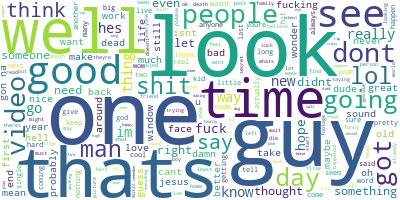

In [5]:
words = " "
for comment in df["text"]:
    for word in comment:
        words += word + " " 

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(words)
wordcloud.to_image()

In [6]:
word_frequencies = Counter()
for sentence in df["text"]:
    for word in sentence:
        word_frequencies[word] += 1
word_frequencies

Counter({'like': 390,
         'one': 219,
         'thats': 189,
         'good': 163,
         'guy': 157,
         'dont': 155,
         'get': 153,
         'well': 145,
         'time': 139,
         'would': 138,
         'im': 130,
         'see': 130,
         'shit': 125,
         'got': 119,
         'looks': 119,
         'people': 118,
         'going': 116,
         'know': 115,
         'think': 109,
         'man': 101,
         'go': 100,
         'lol': 99,
         'really': 95,
         'video': 92,
         'look': 91,
         'hes': 90,
         'could': 89,
         'way': 80,
         'hope': 78,
         'didnt': 77,
         'sure': 77,
         'something': 76,
         'fuck': 76,
         'even': 75,
         'oh': 74,
         'right': 74,
         'day': 72,
         'cant': 70,
         'thought': 70,
         'guys': 69,
         'old': 68,
         'great': 67,
         'jesus': 67,
         'someone': 67,
         'na': 66,
         'fucking': 65,
   

In [8]:
df = df_[df_["cluster"]==4]
scoredf = df.sort_values(by=["score"], ascending= False)
for post in scoredf["text"][:200]:
    print(post)

Singapore executes man for trafficking two pounds of cannabis
Couldn't happen to a nicer guy...
H5N1 with 100% fatality rate observed in group of wild seals in the United States
I know a lot of girls that would be smiling, if they were alive.
Oof! I wouldn't want to be a mammal right about now.
"We've successfully discovered Norway!" -Swedish scientists
Well that certainly sends a signal.
Kim better break out the WD40 and get his sub started and loaded with twinkies and Katy Perry CDs.
It's the middle of autumn and was 30C in Sydney yesterday. I am scared for January.
Good thing ive still got my trusty [t-shirt. ](https://youtu.be/ky6o60LcPv8)
Apparently, he rejected a plea deal of 12 years, because he thought that he could prove his innocence since he wasn’t actually caught with its possession. 

[source](https://en.m.wikipedia.org/wiki/Tangaraju_Suppiah)
I love the subtle dig that we just know what all their subs are up to.
This reads like something from The Onion
It would be funny i

In [3]:
import pandas as pd 

In [4]:
df_ = pd.read_csv("df_w_embeddings_cluster.csv")

In [9]:
df = df_[df_["cluster"]==4]
df = df[df["type"]== "post"]
scoredf = df.sort_values(by=["score"], ascending= False)
i = 1
while i < 100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK:", scoredf["url"].iloc[i])
    i+=1

H5N1 with 100% fatality rate observed in group of wild seals in the United States 
SUBRED: World News LINK: https://www.birdguides.com/articles/bird-flu-killed-hundreds-of-seals-in-new-england/
Spain recorded its hottest ever temperature for April on Thursday, hitting 38.8°C (101.8°F) according to the country's meteorological service. 
SUBRED: World News LINK: https://www.bbc.com/news/science-environment-65403381
Kiwi pilot hostage: ‘I am alive, I am healthy’, kidnapped pilot Phillip Mehrtens in new video 
SUBRED: World News LINK: https://www.nzherald.co.nz/nz/kiwi-pilot-hostage-i-am-alive-i-am-healthy-kidnapped-pilot-phillip-mehrtens-in-new-video/P4MNVWUC65GDTI3A5H6XCDCCDQ/
Dad comes home from war to surprise his daughter at school (No Music - Sound On) 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/jxio3zvnpzta1
Its coming 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/s7pcephbp3ua1
Lithuanian rower completes solo journey across the Atlantic 
SUBRED: World News LINK: https://ww

IndexError: single positional indexer is out-of-bounds

In [9]:
df = df_[df_["cluster"]==4]
df = df[df["type"]== "post"]
df = df[df["subreddit"] != "World News"]
scoredf = df.sort_values(by=["score"], ascending= False)
i = 1
while i < 100:
    print(scoredf["text"].iloc[i], "\nSUBRED:", scoredf["subreddit"].iloc[i], "LINK:", scoredf["url"].iloc[i])
    i+=1

Its coming 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/s7pcephbp3ua1
Dance coach returned from Bakhmut to visit his students 🥲 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/yjxrnoghfxsa1
A happy surprise! 
SUBRED: Ukraine Conflict LINK: https://v.redd.it/2wyvicowviwa1
I know it's bad, just wanted to share 
SUBRED: Ukraine Conflict LINK: https://i.redd.it/hcp6nk94ynva1.png
BAKHMUT FIGHT FOR THE ROAD OF LIFE POV 
SUBRED: Ukraine Conflict LINK: https://youtu.be/QVNQ73GCQAY
“My Daughter Got Two Bullets in The Stomach.” Family Memories About the Escape From Fiery Irpin 
SUBRED: Ukraine Conflict LINK: https://medium.com/@thepureevil/my-daughter-got-two-bullets-in-the-stomach-family-memories-about-the-escape-from-fiery-irpin-1893388a54b5
Postcard of the day! 
SUBRED: Ukraine Conflict LINK: https://i.redd.it/s2ku8lxoxqta1.jpg
The New Wall Street Journal Editor Emma Tucker Has to Save Evan Gershkovich... I don't envy her this task....though I wish her best.... 
SUBRED: Ukraine Conflic

IndexError: single positional indexer is out-of-bounds

In [18]:
scoredf["text"].iloc[2]

"Spain recorded its hottest ever temperature for April on Thursday, hitting 38.8°C (101.8°F) according to the country's meteorological service."

In [18]:
import pandas as pd
df_ = pd.read_csv("df_w_embeddings_cluster.csv")
topic = df_[df_["cluster"]==4]
topic= topic[topic["subreddit"] != "World News"]
topic["topic"] = "Personal War Stories"
topic.to_csv("topic_4_labeled_originaltext.csv")

In [21]:
topic[topic["subreddit"] == "World News"]

,Unnamed: 0,id,text,url,type,postbody,score,created,subreddit,embeddings,cluster,topic
